## Problem Statement

### Business Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


### Objective

To analyze the data and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


### Data Description

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- title - the title of anime
- description - the synopsis of the plot
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- sznOfRelease - the season of release (Winter, Spring, Fall)
- years_running - number of years the anime ran/is running
- studio_primary - primary studio of production
- studios_colab - whether there was a collaboration between studios to produce the anime
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_Based_on_a_Manga - whether the anime is based on a manga
- tag_Comedy - whether the anime is of Comedy genre
- tag_Action - whether the anime is of Action genre
- tag_Fantasy - whether the anime is of Fantasy genre
- tag_Sci_Fi - whether the anime is of Sci-Fi genre
- tag_Shounen - whether the anime has a tag Shounen
- tag_Original_Work - whether the anime is an original work
- tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
- tag_Drama - whether the anime is of Drama genre
- tag_Adventure - whether the anime is of Adventure genre
- tag_Family_Friendly - whether the anime is family-friendly
- tag_Short_Episodes - whether the anime has short episodes
- tag_School_Life - whether the anime is regarding school life
- tag_Romance - whether the anime is of Romance genre
- tag_Shorts - whether the anime has a tag Shorts
- tag_Slice_of_Life - whether the anime has a tag Slice of Life
- tag_Seinen - whether the anime has a tag Seinen
- tag_Supernatural - whether the anime has a tag Supernatural
- tag_Magic - whether the anime has a tag Magic
- tag_Animal_Protagonists - whether the anime has animal protagonists
- tag_Ecchi - whether the anime has a tag Ecchi
- tag_Mecha - whether the anime has a tag Mecha
- tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
- tag_CG_Animation - whether the anime has a tag CG Animation
- tag_Superpowers - whether the anime has a tag Superpowers
- tag_Others - whether the anime has other tags
- tag_is_missing - whether tag is missing or not

## Importing necessary libraries

In [100]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to assist in selecting the optimal model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# to build a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# To build linear regression_model
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab
import scipy.stats as stats
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

## Load and Describe the Dataset

In [101]:
# While doing further analysize it was noticed that is_missing is also null so let's just make that clear on load
data = pd.read_csv('data/anime_data.csv', na_values=["is_missing"])
data.describe(include='all')

title  \
count                              12101   
unique                             12101   
top     Fullmetal Alchemist: Brotherhood   
freq                                   1   
mean                                 NaN   
std                                  NaN   
min                                  NaN   
25%                                  NaN   
50%                                  NaN   
75%                                  NaN   
max                                  NaN   

                                              description mediaType  \
count                                                7633     12038   
unique                                               7572         8   
top     In 19th century Belgium, in the Flanders count...        TV   
freq                                                    3      3993   
mean                                                  NaN       NaN   
std                                                   NaN       NaN   
min                                                   NaN       NaN   
25%                                                   NaN       NaN   
50%                                                   NaN       NaN   
75%                                                   NaN       NaN   
max                                                   NaN       NaN   

                 eps     duration ongoing sznOfRelease  years_running  \
count   12101.000000  7465.000000   12101         3547   12101.000000   
unique           NaN          NaN       2            4            NaN   
top              NaN          NaN   False       Spring            NaN   
freq             NaN          NaN   11986         1135            NaN   
mean       13.393356    24.230141     NaN          NaN       0.283200   
std        57.925097    31.468171     NaN          NaN       1.152234   
min         1.000000     1.000000     NaN          NaN       0.000000   
25%         1.000000     4.000000     NaN          NaN       0.000000   
50%         2.000000     8.000000     NaN          NaN       0.000000   
75%        12.000000    30.000000     NaN          NaN       0.000000   
max      2527.000000   163.000000     NaN          NaN      51.000000   

       studio_primary  studios_colab   contentWarn        watched  \
count            8893   12101.000000  12101.000000   12101.000000   
unique             21            NaN           NaN            NaN   
top            Others            NaN           NaN            NaN   
freq             4340            NaN           NaN            NaN   
mean              NaN       0.051649      0.115362    2862.605694   
std               NaN       0.221326      0.319472    7724.347024   
min               NaN       0.000000      0.000000       0.000000   
25%               NaN       0.000000      0.000000      55.000000   
50%               NaN       0.000000      0.000000     341.000000   
75%               NaN       0.000000      0.000000    2026.000000   
max               NaN       1.000000      1.000000  161567.000000   

            watching     wantWatch       dropped        rating          votes  \
count   12101.000000  12101.000000  12101.000000  12101.000000   12101.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean      256.334435   1203.681431    151.568383      2.949037    2088.124700   
std      1380.840902   2294.327380    493.931710      0.827385    5950.332228   
min         0.000000      0.000000      0.000000      0.844000      10.000000   
25%         2.000000     49.000000      3.000000      2.304000      34.000000   
50%        14.000000    296.000000     12.000000      2.965000     219.000000   
75%       100.000000   1275.000000     65.000000      3.616000    1414.000000   
max     74537.000000  28541.000000  19481.000000      4.

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12038 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                3547 non-null   object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              8893 non-null   object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

## Check for Missing or Duplicated Data

In [103]:
data.isna().sum()

title                            0
description                   4468
mediaType                       63
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                  8554
years_running                    0
studio_primary                3208
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

In [104]:
data.duplicated().sum()

0

**We have no duplicated rows, but there are some missing values in the description, duration, mediaType, sznOfRelease, and studio_primary columns.  Description can likely just be dropped as it will likely have too much variance from one Anime to another to have any reasonable impact.  This is likely the case with the season of release and since it's missing in more than two thirds of the dataset it likely won't do us much good.  The column for mediaType already has a value of Other which makes sense for those rows where it isn't provided.  Primary Studio and Duration, however, could have an impact and we may be able to fill it in.**

In [105]:
# Drop the description and sznOfRelease columns
san_data = data.drop(['description', 'sznOfRelease'], axis=1)

# Set the null values in mediaType to 'Other'
san_data['mediaType'].fillna('Other', inplace=True)

san_data.isna().sum()

title                            0
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
years_running                    0
studio_primary                3208
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes               0
tag_School_Life                  0
tag_Romance         

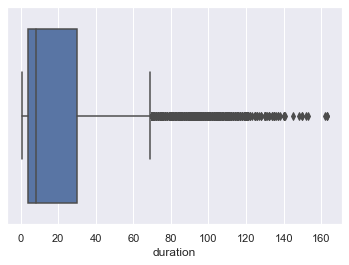

In [106]:
sns.boxplot(data=san_data, x='duration')
plt.show();

It looks like there are quite a few outliers in the duration column, but looking at the data dictionary there are three columns that are not null for any row that we may be able to leverage:

* eps (If it's a movie it is a 1 and since movies are generally longer this would be a good indicator)
* tag_Short_Episodes (Indicates if episodes are short)
* tag_Shorts (Indicates whether it is a short)

The last column is a bit less descriptive so we'll only use that one if we have to.  Let's see how we can divide this data further to get more insight into the duration for the missing values.

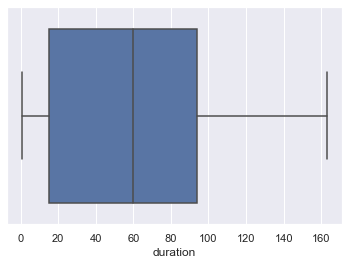

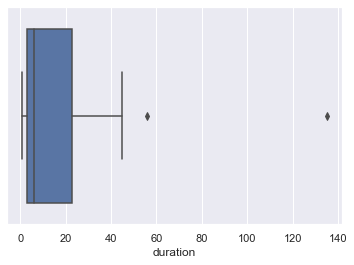

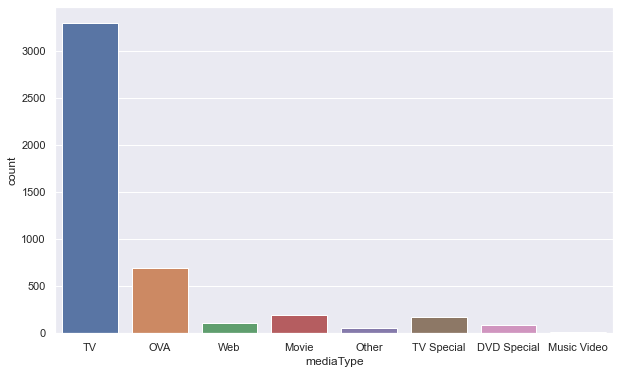

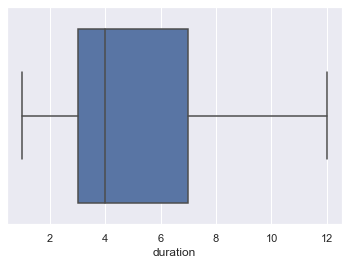

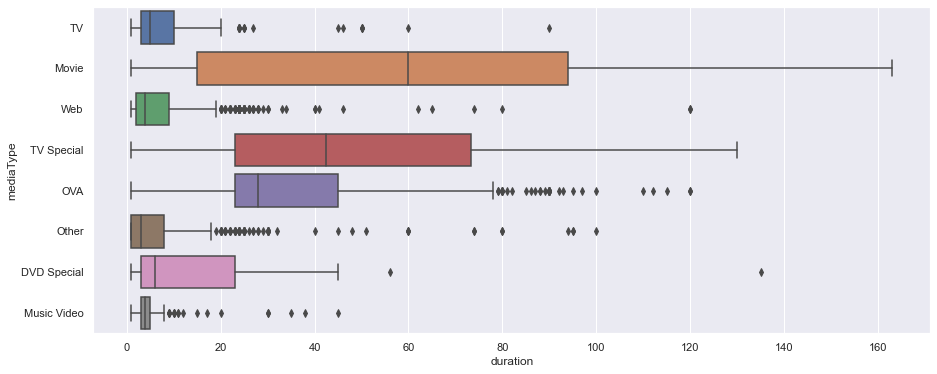

In [107]:
# Get only rows where duration is missing
duration_missing = san_data[san_data['duration'].isna()]

# Truncate to only the columns we care about for the purposes of filling in null values for duration
duration_trunc = duration_missing[['title', 'duration', 'mediaType', 'eps', 'ongoing', 'tag_Shorts', 'tag_Short_Episodes']]
duration_trunc.head()

# No repitition in title and top mediaType is TV
duration_trunc.describe(include='all')

# No outliers for duration when mediaType is movie so we can use average or median here
sns.boxplot(data=san_data[san_data['mediaType'] == "Movie"], x='duration')
plt.show();

# Mean and median are pretty close, we'll go with the mean for when it'a movie as there are no outliers
san_data[san_data['mediaType'] == "Movie"]['duration'].median()
san_data[san_data['mediaType'] == "Movie"]['duration'].mean()

# What other types of media are there
# 'TV', 'OVA', 'Web', 'Movie', nan, 'TV Special', 'DVD Special','Other', 'Music Video'
duration_trunc['mediaType'].unique()

# Go with median here
sns.boxplot(data=san_data[san_data['mediaType'] == "DVD Special"], x='duration')
plt.show();

# Get a count of all nulls by media type
plt.figure(figsize=(10,6))
sns.countplot(data=duration_trunc, x="mediaType")
plt.show();

sns.boxplot(data=san_data[(san_data['mediaType'] == "TV") & ((san_data['tag_Short_Episodes'] == 1) | (san_data['tag_Shorts'] == 1)) & (san_data['eps'] > 1)], x='duration')
plt.show();

san_data[san_data['mediaType'] == "TV"]['duration'].median()
san_data[san_data['mediaType'] == "TV"]['duration'].mean()

# 575
san_data[(san_data['mediaType'] == "TV") & ((san_data['tag_Short_Episodes'] == 1) | (san_data['tag_Shorts'] == 1)) & (san_data['eps'] > 1)].shape

# 4
san_data[(san_data['mediaType'] == "TV") & ((san_data['tag_Short_Episodes'] == 0) | (san_data['tag_Shorts'] == 0)) & (san_data['eps'] == 1)].shape

#sns.boxplot(data=san_data[((san_data['tag_Shorts'] == 0) | (san_data['tag_Short_Episodes'] == 0)) & (san_data['eps'] > 1)], x="duration", y='mediaType')
plt.figure(figsize=(15,6))
sns.boxplot(data=san_data, x="duration", y='mediaType')
plt.show();

This is turning into more work than originally anticipated.  Before we go deeper down this rabbit hole, let's create a dataset with only the columns that have missing values and the column we want to predict and see if there are any correlations there.  If the correlation is zero, we're good to just drop it.

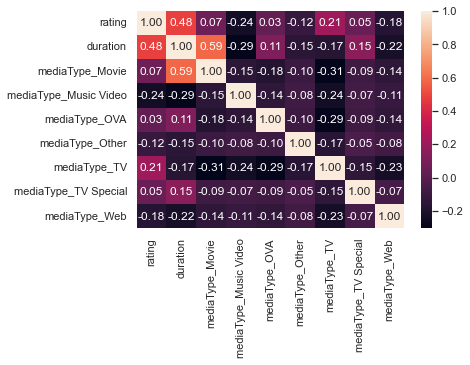

In [108]:
nulls_with_dependent_var = san_data[['rating', 'mediaType', 'duration']]
nulls_with_dependent_var.head()
encoded_data = pd.get_dummies(nulls_with_dependent_var, columns=nulls_with_dependent_var.select_dtypes(include=["object","category"]).columns.tolist(), drop_first=True)
sns.heatmap(encoded_data.corr(), annot=True, fmt='0.2f');

Duration definitely shows a decent amount of correlation to rating which was expected.  In the interest of time I'll fill in the null values for duration with the median value for duration for other animes of that same type.  There are quite a few categories with a large amount of outliers and in cases where there aren't many or no outliers the average and median are fairly close to one another so this seems like the fairest option.

In [109]:
# Group by mediaType and fill in null values with median of same mediaType
san_data['duration'] = san_data['duration'].fillna(san_data.groupby('mediaType')['duration'].transform('median'))
san_data.isna().sum()

title                            0
mediaType                        0
eps                              0
duration                         0
ongoing                          0
years_running                    0
studio_primary                3208
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes               0
tag_School_Life                  0
tag_Romance         

Now to dig into the studio_primary null values

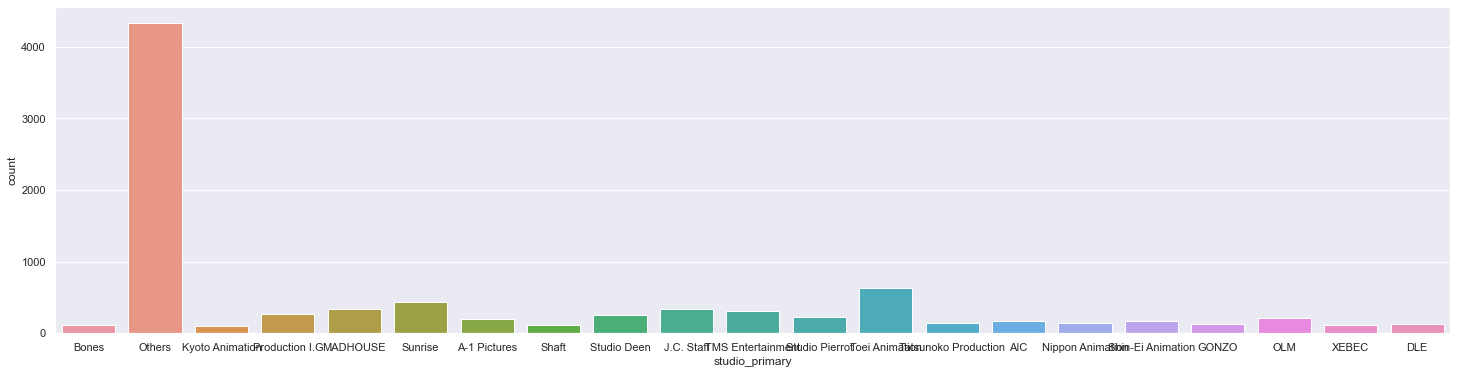

In [110]:
san_data['studio_primary'].unique()

plt.figure(figsize=(25,6))
sns.countplot(data=san_data, x='studio_primary')
plt.show()

A quick Google search shows some of the most common production studios for Animes (I don't watch them personally so I'm pretty ignorant here) and Others is definitely not one of them.  Therefore I believe that category is for undefined or in other words null (NaN).  So we'll just fill in the null values with that same value

In [111]:
# Set the null values in mediaType to 'Other'
san_data['studio_primary'].fillna('Others', inplace=True)
san_data.isna().sum()

title                         0
mediaType                     0
eps                           0
duration                      0
ongoing                       0
years_running                 0
studio_primary                0
studios_colab                 0
contentWarn                   0
watched                       0
watching                      0
wantWatch                     0
dropped                       0
rating                        0
votes                         0
tag_Based_on_a_Manga          0
tag_Comedy                    0
tag_Action                    0
tag_Fantasy                   0
tag_Sci_Fi                    0
tag_Shounen                   0
tag_Original_Work             0
tag_Non_Human_Protagonists    0
tag_Drama                     0
tag_Adventure                 0
tag_Family_Friendly           0
tag_Short_Episodes            0
tag_School_Life               0
tag_Romance                   0
tag_Shorts                    0
tag_Slice_of_Life             0
tag_Sein

## Diving Deeper into the Data

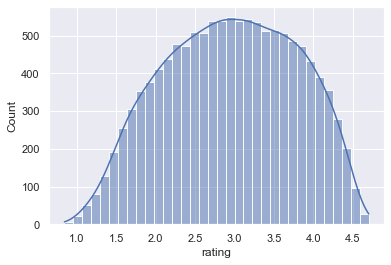

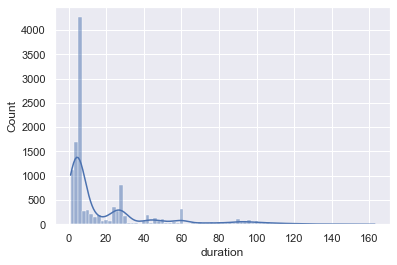

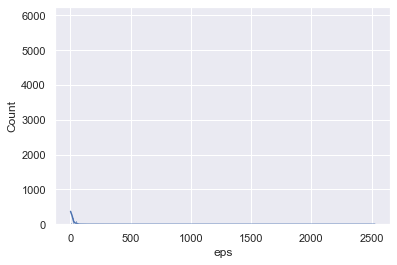

In [112]:
sns.histplot(data=san_data['rating'], kde=True)
plt.show()

sns.histplot(data=san_data['duration'], kde=True)
plt.show()

sns.histplot(data=san_data['eps'], kde=True)
plt.show()

The rating column has a fairly normal distribution while eps and duration are very much right skewed.

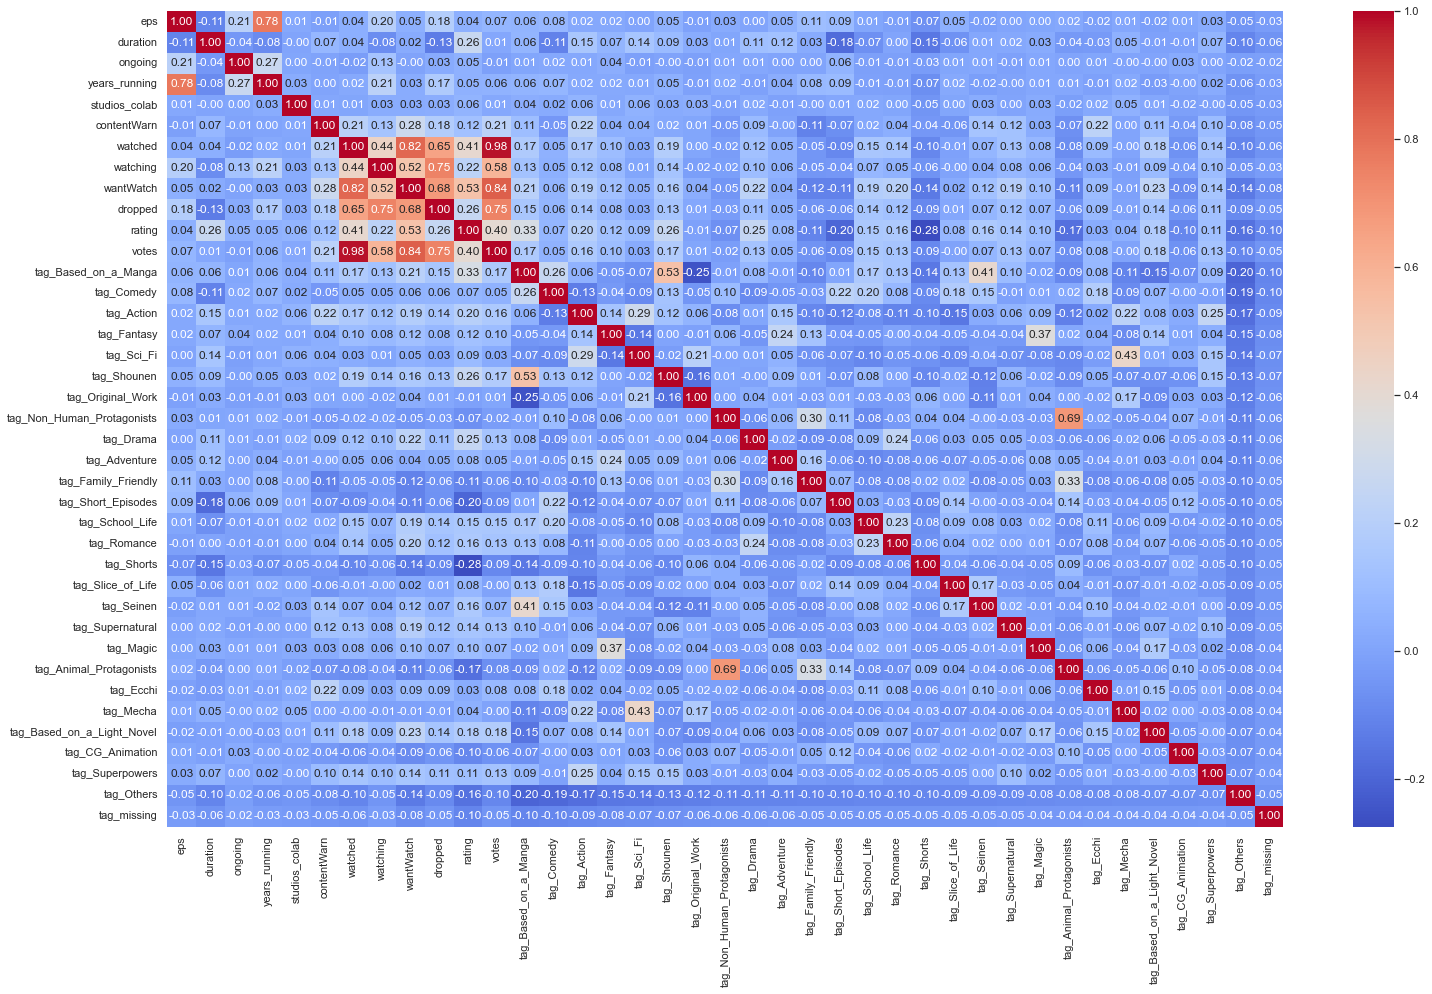

In [113]:
plt.figure(figsize=(25,15))
sns.heatmap(san_data.corr(), fmt='0.2f', annot=True, cmap='coolwarm')
plt.show();

This is a bit too difficult to see so instead I'll break this down into a few different data frames:

* Rating + Tags
* Rating - Tags
* Rating + MediaType (One hot encoded)
* Rating + Studios_primary (One hot encoded)

We'll also probably want ot drop the title column before we start building the model as they are all unique and will provide no value at all.

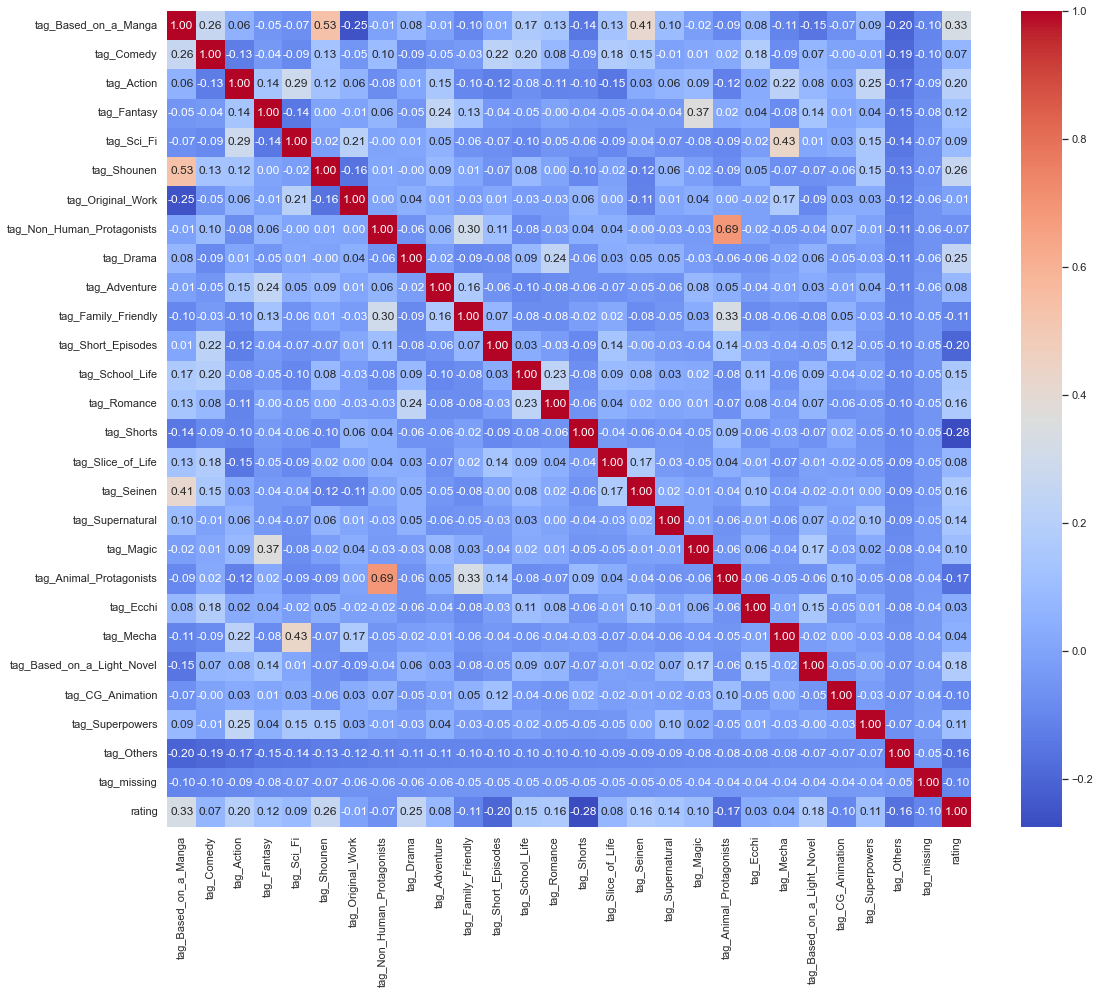

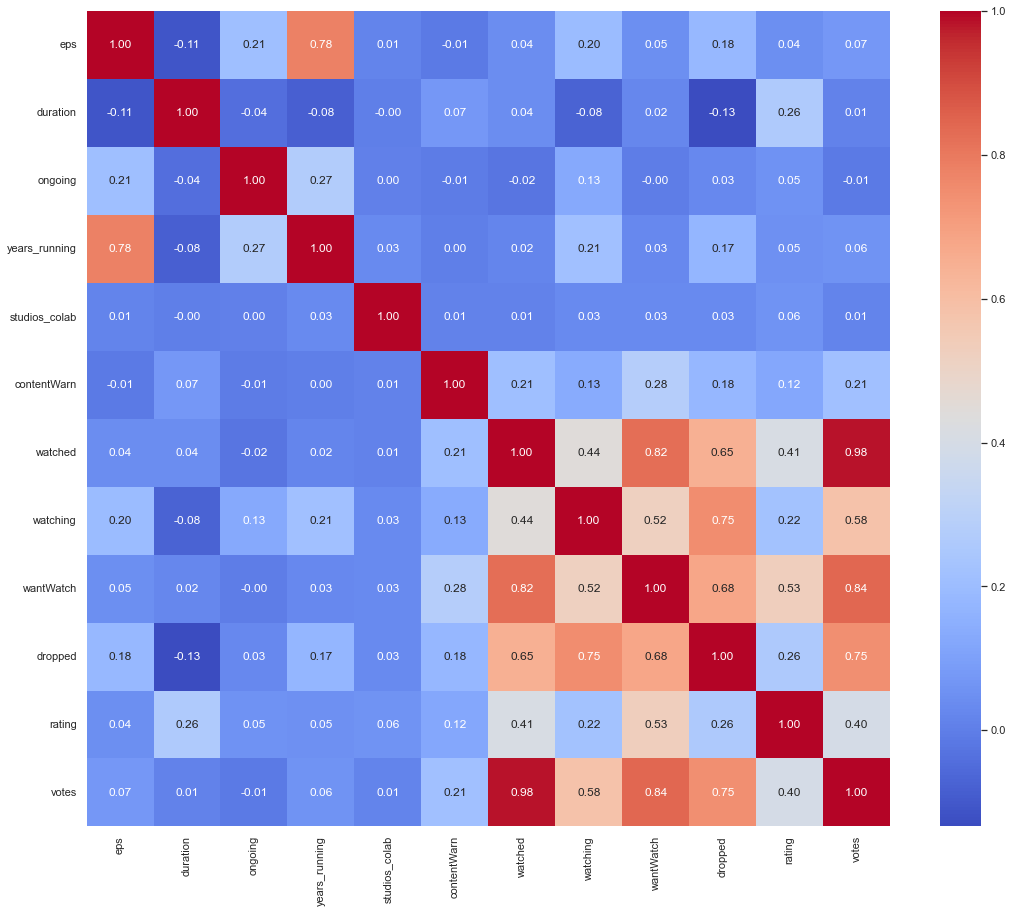

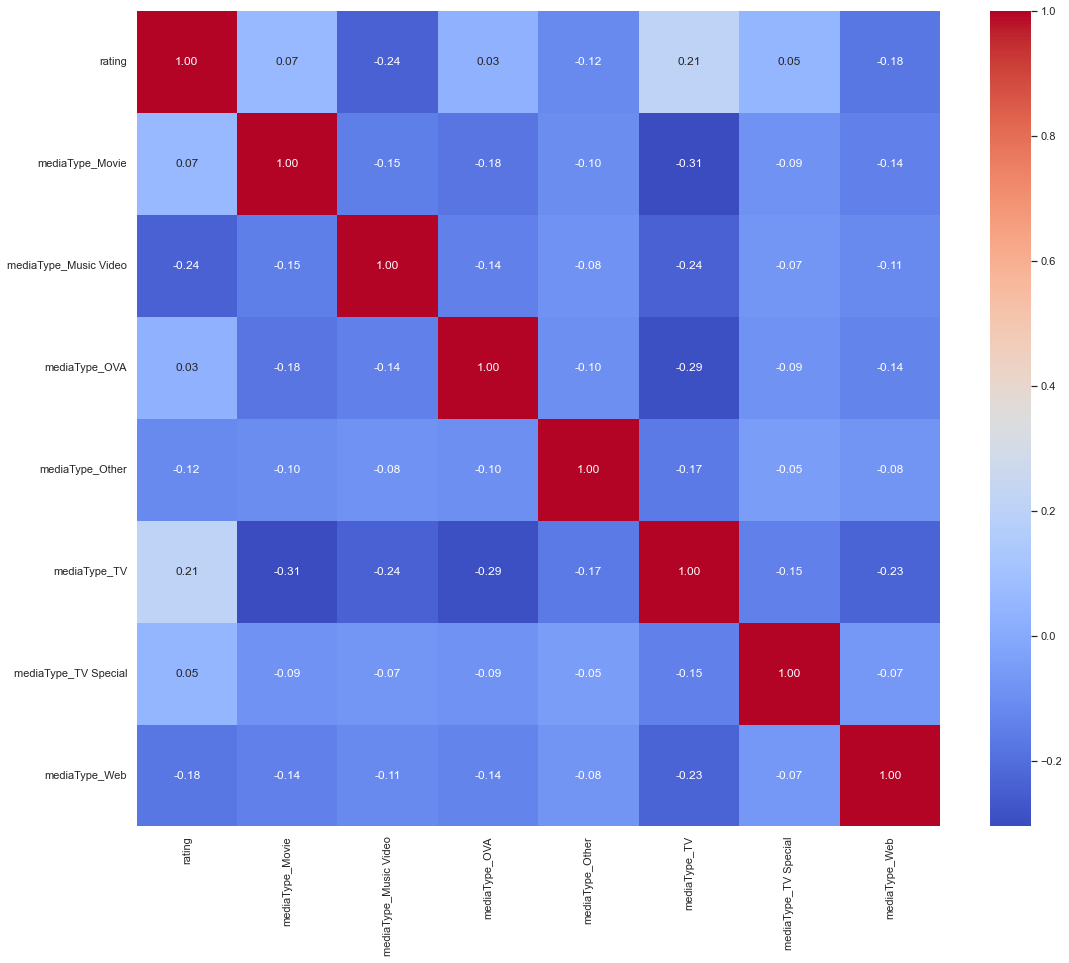

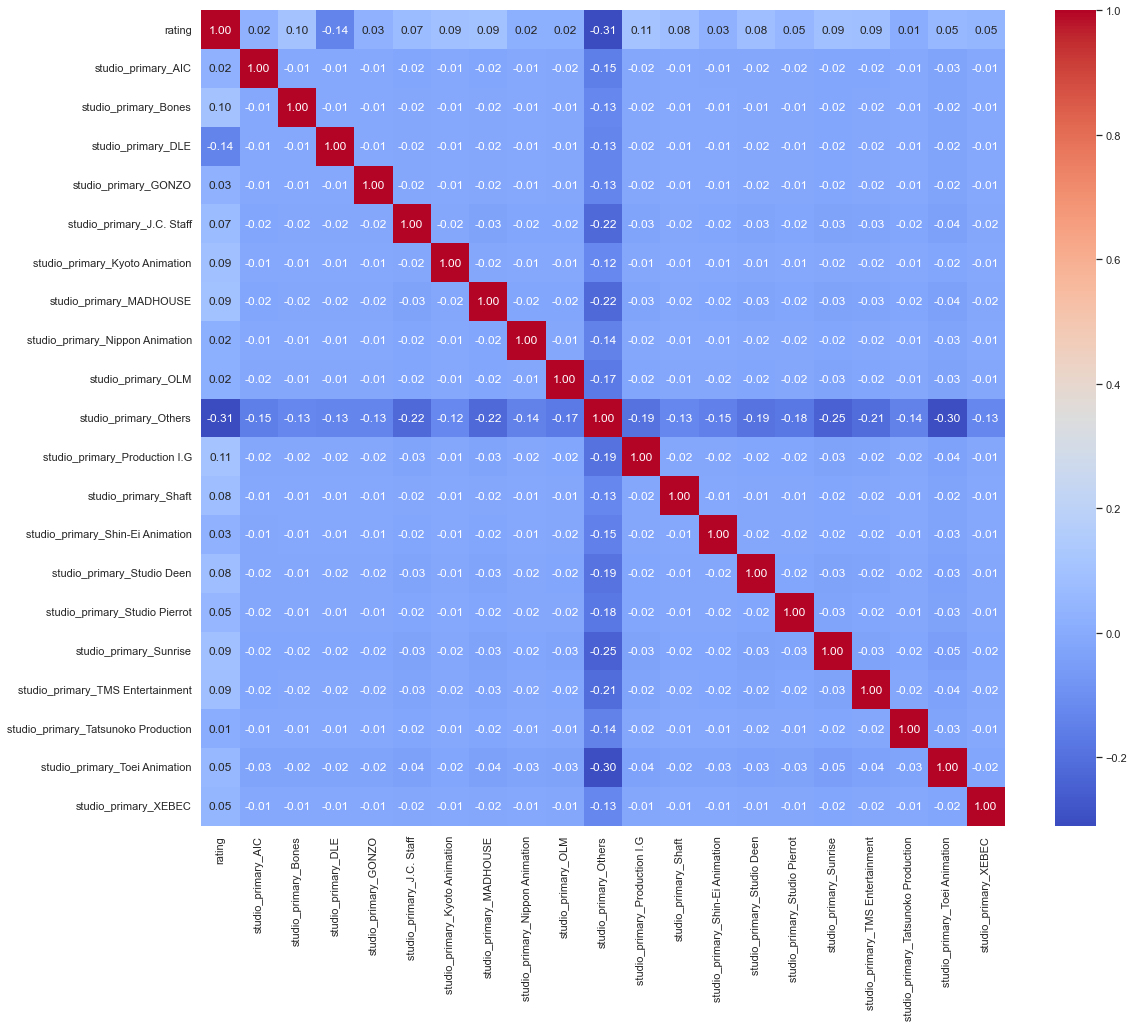

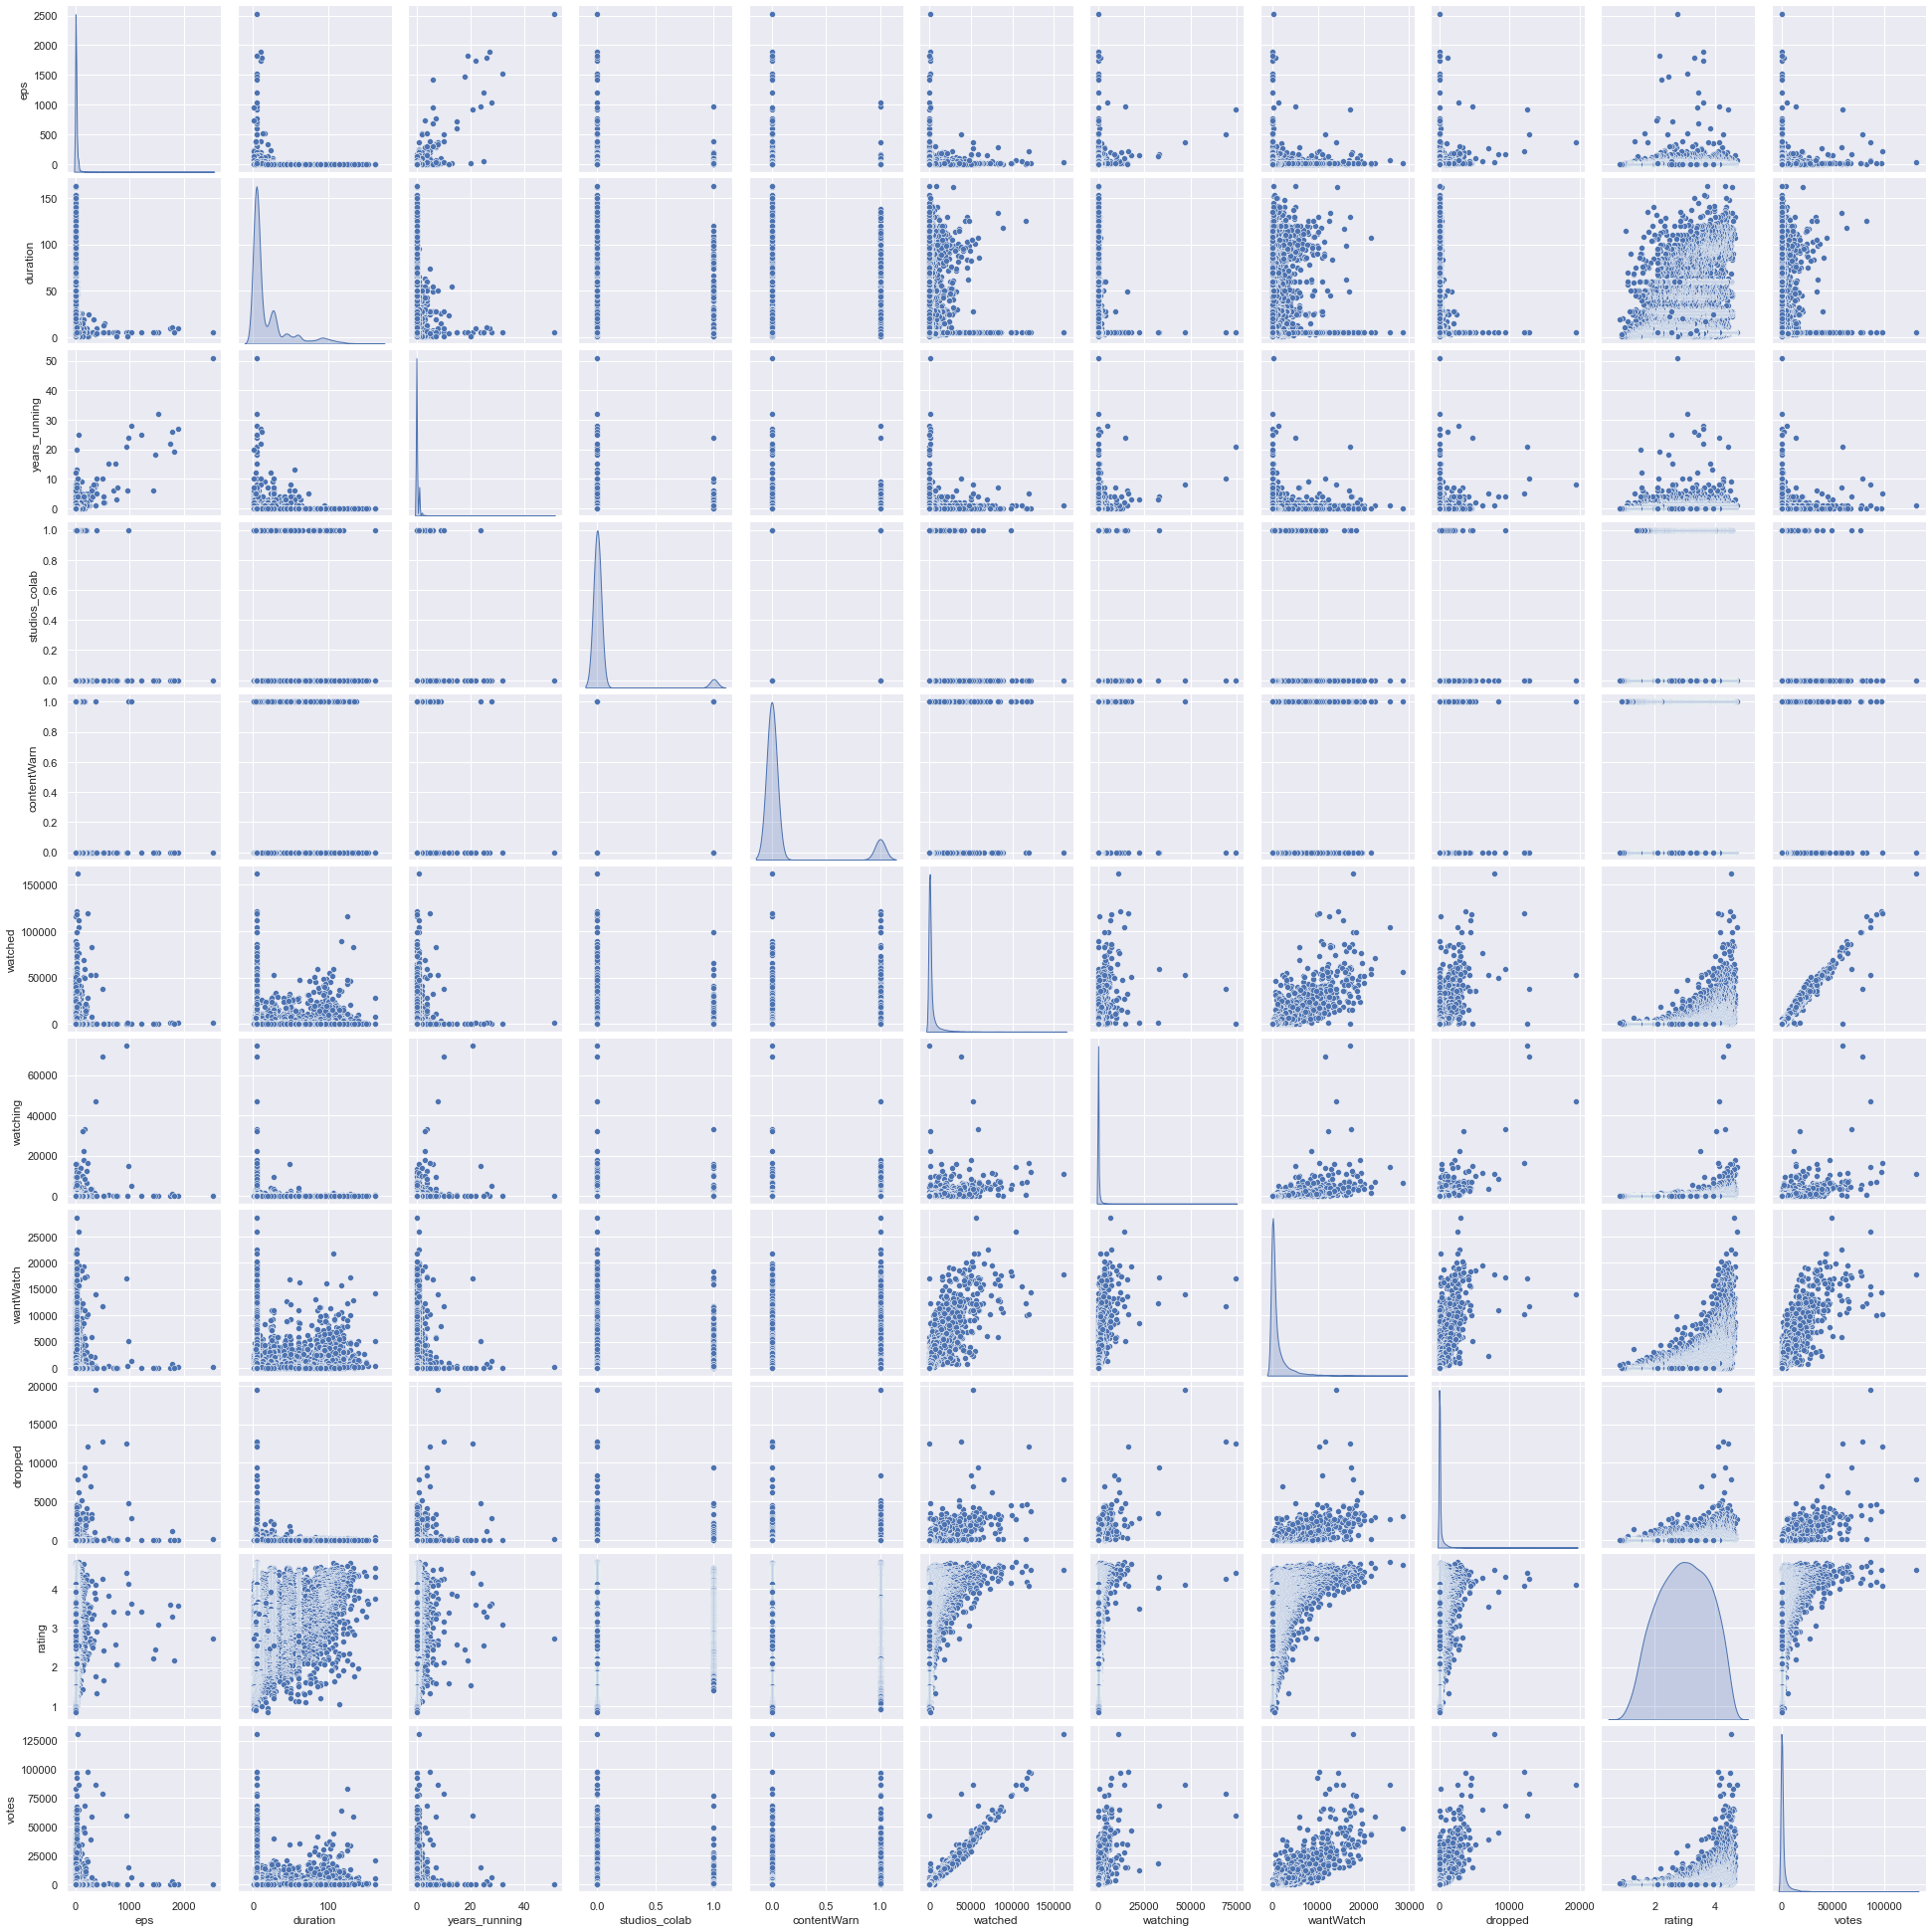

In [114]:
rating_tags = san_data[san_data.filter(regex='^tag').columns.tolist() + ['rating']]
rating_no_tags = san_data.drop(columns=san_data.filter(regex='^tag').columns)
rating_media_type = san_data[['rating', 'mediaType']]
rating_media_type = pd.get_dummies(rating_media_type, columns=['mediaType'], drop_first=True)
rating_studio = san_data[['rating', 'studio_primary']]
rating_studio = pd.get_dummies(rating_studio, columns=['studio_primary'], drop_first=True)

plt.figure(figsize=(18,15))
sns.heatmap(rating_tags.corr(), fmt='0.2f', annot=True, cmap='coolwarm')
plt.show();

plt.figure(figsize=(18,15))
sns.heatmap(rating_no_tags.corr(), fmt='0.2f', annot=True, cmap='coolwarm')
plt.show();

plt.figure(figsize=(18,15))
sns.heatmap(rating_media_type.corr(), fmt='0.2f', annot=True, cmap='coolwarm')
plt.show();

plt.figure(figsize=(18,15))
sns.heatmap(rating_studio.corr(), fmt='0.2f', annot=True, cmap='coolwarm')
plt.show();

# This is the only where a pairplot makes sense as we have varying values and not just 1's and 0's

rating_no_tags = rating_no_tags.drop(['title', 'mediaType', 'studio_primary', 'ongoing'], axis=1)
sns.pairplot(rating_no_tags, diag_kind="kde");
plt.show();

We are likely going to have to drop that studios_primary column and may need to do the same with the mediaType column.  Both of them are showing quite a bit of correlation to variables other than what we are attempting to predict.  There doesn't appear to much correaltion at all to the studios with the exception of 'Others'.  However, that is likely because it is by far the most common out of all of them so this correlation is misleading.  For that reason, I believe it makes sense to drop it before we start regression.

The mediaType correlation is a bit interesting and there are only eight different types so that one should be fine to keep in during our first run and we can tune from there.

The tags column shows some correlation amongst other tags as well which will be an interesting problem to solve.  At first glance, it seems it may make sense to combine some of the tags as they describe very similar things.  For example, Animal Protagonists and Non Human Protagonists show a relatively high correlation to one another as one could be said to be a subset of the other.  This should be kept in mind after running the initial regression as it will likely have to be revisited. 

The scatterplot reveals a clear pattern for watched, watching, wantWatch, and votes.  There appears to be a weaker pattern in the dropped column as it relates to the rating.  However, it doesn't appear to be a linear pattern, but rather more of an exponential one so we may need to transform that data so it better adheres to the assumptions of linear regression.

## Model the Data

In [115]:
model_data = san_data.drop(['title', 'studio_primary'], axis=1)
model_data = pd.get_dummies(model_data, columns=['mediaType'], drop_first=True)
model_data['ongoing'] = model_data['ongoing'].astype(int) 

X = model_data.drop(['rating'], axis=1)
y = model_data['rating']
X = sm.add_constant(X)

# Using 80/20 split since we have a good amount of data
# If we had less than 2,000 or so I might be inclined to go with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=23
)

olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:26:19   Log-Likelihood:                -8491.7
No. Observations:                9680   AIC:                         1.708e+04
Df Residuals:                    9634   BIC:                         1.741e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

The adjusted R-squared value of 0.500 is not the best starting point and we can't really trust the p score until we've dealt with any possible multicolinearity which we very likely have so let's check the VIF scores next.

## Checking for Multicolinearity

In [116]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                          20.627414
eps                             3.102920
duration                        3.007037
ongoing                         1.158996
years_running                   3.156445
studios_colab                   1.023271
contentWarn                     1.237941
watched                       151.947270
watching                        7.184473
wantWatch                       4.496628
dropped                         5.111949
votes                         199.603012
tag_Based_on_a_Manga            2.617684
tag_Comedy                      1.373012
tag_Action                      1.463493
tag_Fantasy                     1.383254
tag_Sci_Fi                      1.537492
tag_Shounen                     1.939241
tag_Original_Work               1.249117
tag_Non_Human_Protagonists      2.036647
tag_Drama                       1.201071
tag_Adventure                   1.175739
tag_Family_Friendly             1.323006
tag_Short_Episodes              1.369203
ta

The votes and watched column have the largest score by far which makes sense as both would be indicators of popularity.  We'll drop the votes column first as it has the highest score, but I do wonder if it makes more sense to combine the two columns.  This may be something to revisit at the end to see if we can get more accuracy, but for now we'll drop it

In [117]:
X_train2 = X_train.drop(['votes'], axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                         20.617363
eps                            3.102079
duration                       3.006751
ongoing                        1.125306
years_running                  3.151411
studios_colab                  1.023047
contentWarn                    1.236495
watched                        3.666552
watching                       2.672283
wantWatch                      4.464176
dropped                        3.857328
tag_Based_on_a_Manga           2.610765
tag_Comedy                     1.373009
tag_Action                     1.451562
tag_Fantasy                    1.380447
tag_Sci_Fi                     1.536795
tag_Shounen                    1.916212
tag_Original_Work              1.248267
tag_Non_Human_Protagonists     2.035653
tag_Drama                      1.200765
tag_Adventure                  1.175721
tag_Family_Friendly            1.322136
tag_Short_Episodes             1.367722
tag_School_Life                1.180695
tag_Romance               

It looks like dropping the votes column was all that was needed, so let's run it again.

In [118]:
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.5 
Adjusted R-squared: 0.498


We only lost .002 off of our adjusted R-squared score which is a good sign as it had little impact on our model.  Let's run the summary again as we can now trust the p scores.

In [119]:
print(olsres_2.summary())
# eps, studios_collab, watched, tag_Comedy, tag_Original_Work, tag_Non_Human_Protagonists, tag_Adventure, tag_Magic, tag_Superpowers, tag_Others, mediaType_TV

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:26:21   Log-Likelihood:                -8514.4
No. Observations:                9680   AIC:                         1.712e+04
Df Residuals:                    9635   BIC:                         1.744e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [120]:
# Drop the columns with highest p scores and rerun the regression
X_train3 = X_train2.drop(['eps', 'studios_colab', 'watched', 'tag_Comedy', 'tag_Original_Work', 'tag_Non_Human_Protagonists', 'tag_Adventure', 'tag_Magic', 'tag_Superpowers', 'tag_Others', 'mediaType_TV'], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     291.8
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:26:22   Log-Likelihood:                -8521.4
No. Observations:                9680   AIC:                         1.711e+04
Df Residuals:                    9646   BIC:                         1.735e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

After dropping the values, the adjusted R-squared score is unaffected so let's move on to the next phase.

## Testing for Linearity

In [121]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_3.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_3.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0          3.215       2.796330   0.418670
1          2.906       3.035974  -0.129974
2          2.195       2.269758  -0.074758
3          3.673       3.680561  -0.007561
4          2.539       2.854661  -0.315661

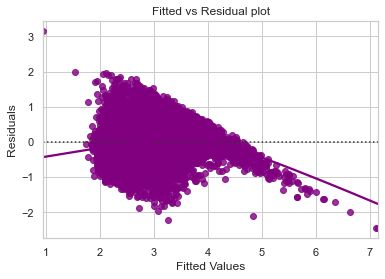

In [122]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

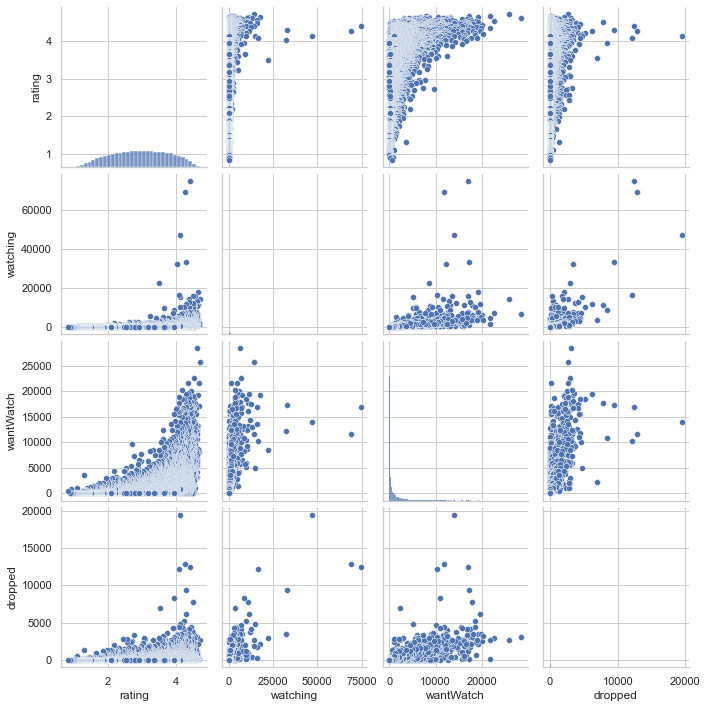

In [123]:
# Would normally use this, but the amount of data makes this not very feasible
train_cols = X_train3.columns.tolist()
train_cols.remove('const')

# wantWatch would definitely benefit here
sns.pairplot(model_data[['rating','watching', 'wantWatch', 'dropped']])
plt.show()


In [124]:
# using square transformation
X_train3["wantWatch_sq"] = np.square(X_train3["wantWatch"])

# let's create a model with the transformed data
olsmod_4 = sm.OLS(y_train, X_train3)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     327.2
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:26:46   Log-Likelihood:                -8159.3
No. Observations:                9680   AIC:                         1.639e+04
Df Residuals:                    9645   BIC:                         1.664e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

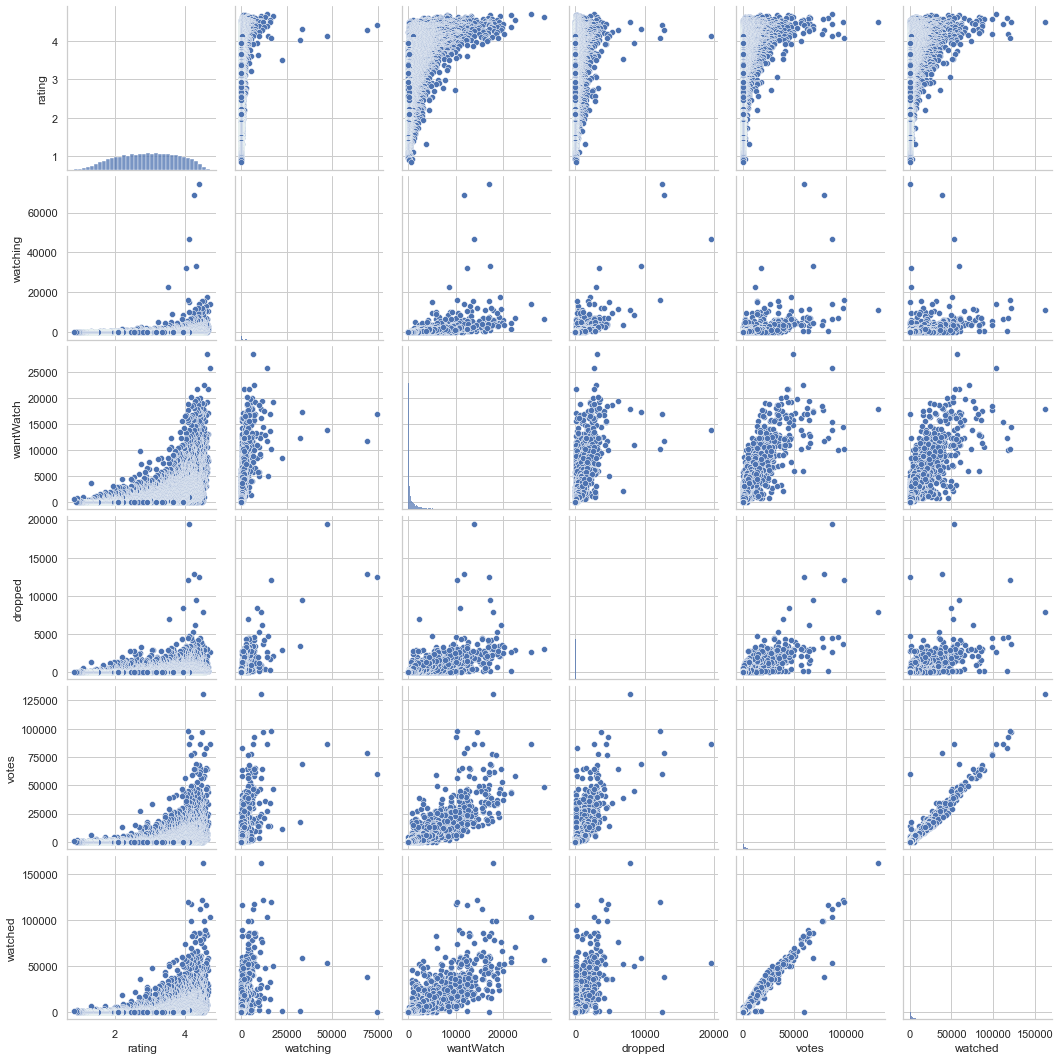

In [125]:
sns.pairplot(model_data[['rating','watching', 'wantWatch', 'dropped', 'votes', 'watched']])
plt.show()

Okay, probably should have looked at this first.  We have a high degree of linearity between votes and watched which I'll combine into a new column called pop_index (popularity index) as combined they seemed to be a great indicator of the popularity for a given anime.

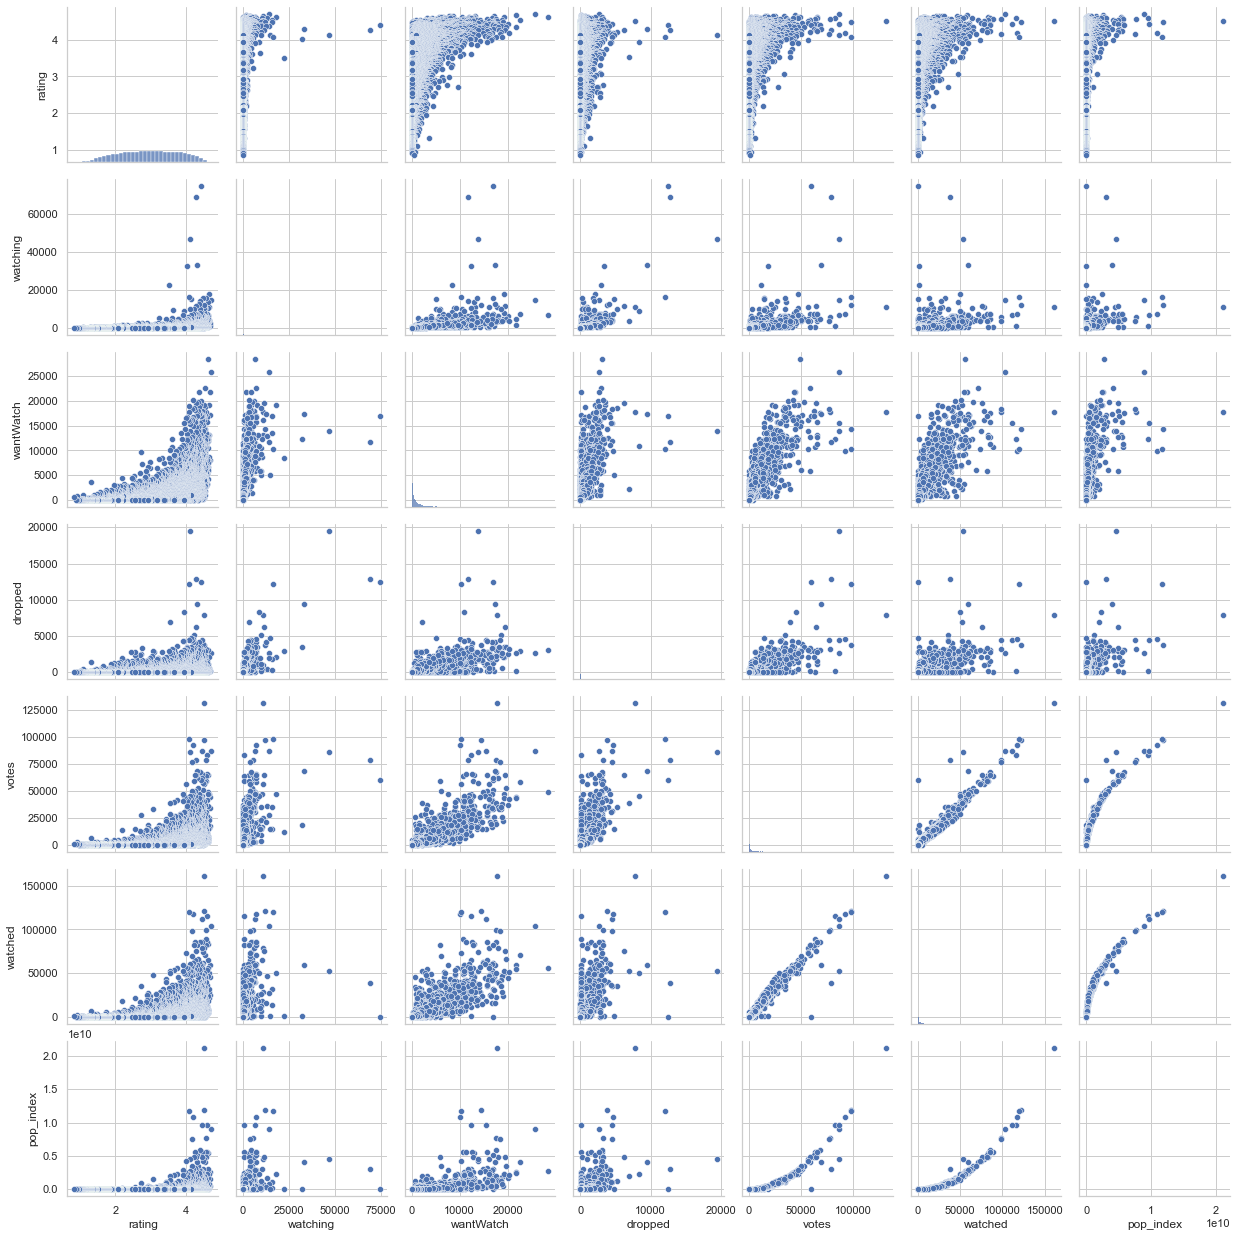

In [126]:
model2_data = model_data.copy()
model2_data['pop_index'] = model2_data['watched'] * model2_data['votes']
sns.pairplot(model2_data[['rating','watching', 'wantWatch', 'dropped', 'votes', 'watched', 'pop_index']])
plt.show()

There may be a potential problem with this approach on the pop_index as anything multiplied by 0 will equal 0.

In [127]:
model2_data[model2_data['votes'] == 0]
model2_data[model2_data['watched'] == 0]

eps  duration  ongoing  years_running  studios_colab  contentWarn  \
1570   13      12.0        0              0              0            0   
2202   13      14.0        0              0              0            0   
2710   26       5.0        0              1              0            0   
3973    1       4.0        0              0              0            0   
6375    7      28.0        0              2              1            0   
6760   28       5.0        0              1              0            0   
9163    1      28.0        0              0              0            0   

      watched  watching  wantWatch  dropped  rating  votes  \
1570      0.0         0          0        0   3.959   1633   
2202      0.0         0          0        0   3.807    454   
2710      0.0         0          0        0   3.686    905   
3973      0.0         0          0        0   3.406   3918   
6375      0.0         0          0        0   2.899    751   
6760      0.0         0          0        0   2.818     43   
9163      0.0         0          0        0   2.281     23   

      tag_Based_on_a_Manga  tag_Comedy  tag_Action  tag_Fantasy  tag_Sci_Fi  \
1570                     1           1           0            1           0   
2202                     0           1           1            1           0   
2710                     0           0           1            1           0   
3973                     1           1           0            0           0   
6375                     0           0           1            1           0   
6760                     1           1           0            0           0   
9163                     1           0           0            0           0   

      tag_Shounen  tag_Original_Work  tag_Non_Human_Protagonists  tag_Drama  \
1570            0                  0                           0          0   
2202            0                  0                           0          1   
2710            0                  0                           1          0   
3973            1                  0                           0          0   
6375            0                  0                           0          0   
6760            1                  0                           0          0   
9163            0                  0                           0          0   

      tag_Adventure  tag_Family_Friendly  tag_Short_Episodes  tag_School_Life  \
1570              0                    0                   1                0   
2202              0                    0                   0                0   
2710              1                    0                   0                0   
3973              0                    0                   0                1   
6375              1                    0                   0                0   
6760              0                    0                   0                0   
9163              0                    0                   0                0   

      tag_Romance  tag_Shorts  tag_Slice_of_Life  tag_Seinen  \
1570            0           0                  0           1   
2202            1           0                  0           0   
2710            0           0                  0           0   
3973            0           1                  0           0   
6375            0           0                  0           0   
6760            0           0                  0           0   
9163            0           0                  0           0   

      tag_Supernatural  tag_Magic  tag_Animal_Protagonists  tag_Ecchi  \
1570                 0          0                        0          0   
2202                 0          0                        0          0   
2710                 0          0                        0          0   
3973                 0          0                        0          0   
6375                 0          0                        0          0   
6760                 0          0         

In [128]:
model2_data.sort_values(by='votes', ascending=False).head(20)

eps  duration  ongoing  years_running  studios_colab  contentWarn  \
97     37       5.0        0              1              0            0   
1132  220       5.0        0              5              0            0   
108    25       5.0        0              0              0            1   
792    25       5.0        0              0              0            1   
168    51       5.0        0              1              0            1   
0      64       5.0        0              1              0            1   
1014  366       5.0        0              8              0            1   
27      1     125.0        0              0              0            0   
561   500       5.0        0             10              0            0   
40     25       5.0        0              1              0            1   
855    13       5.0        0              0              1            1   
470   175       5.0        0              4              1            0   
263    13       5.0        0              0              0            0   
162    26       5.0        0              0              0            0   
25     12       5.0        0              0              0            1   
596    25       5.0        0              0              0            0   
12     25       5.0        0              0              0            0   
538    51       5.0        0              1              0            0   
39      1     118.0        0              0              0            0   
489    12       5.0        0              0              0            1   

       watched  watching  wantWatch  dropped  rating   votes  \
97    161567.0     11048      17819     7830   4.501  131067   
1132  119474.0     16302      10231    12124   4.080   97965   
108   121565.0     11986      14431     3739   4.488   97268   
792   117831.0      7144       9986     4623   4.184   92416   
168   111770.0      6633      15472     4445   4.437   86608   
0     103707.0     14351      25810     2656   4.702   86547   
1014   53009.0     46914      13937    19481   4.118   86316   
27    115949.0       589      12388      161   4.588   82752   
561    38289.0     69004      11710    12813   4.269   78754   
40     98899.0      5442      17676     3221   4.555   78071   
855    98661.0      3577      18425     4470   4.165   76865   
470    59039.0     33183      17299     9437   4.303   68620   
263    85912.0      4503      17506     3051   4.390   67776   
162    85994.0      4682      11288     3024   4.440   65457   
25     85357.0      7342      12683     1520   4.593   65392   
596    85487.0      7091      15725     2725   4.251   64782   
12     83367.0      3327      13048     1140   4.616   64691   
538    75814.0     11537      19529     6174   4.276   64496   
39     88642.0       359      10657       97   4.557   63527   
489    82220.0      7361      16898     2040   4.298   62049   

      tag_Based_on_a_Manga  tag_Comedy  tag_Action  tag_Fantasy  tag_Sci_Fi  \
97                       1           0           0            0           0   
1132                     1           0           1            0           0   
108                      1           0           1            1           0   
792                      0           0           1            1           1   
168                      1           0           1            1           0   
0                        1           0           1            1           0   
1014                     1           0           1            0           0   
27                       0           0           0            1           0   
561                      1           0           1            1           0   
40                       0           0           0            0           1   
855                      1           0           0            0           0   
470                      1           1           1            1           0   
263                      0           1           1        

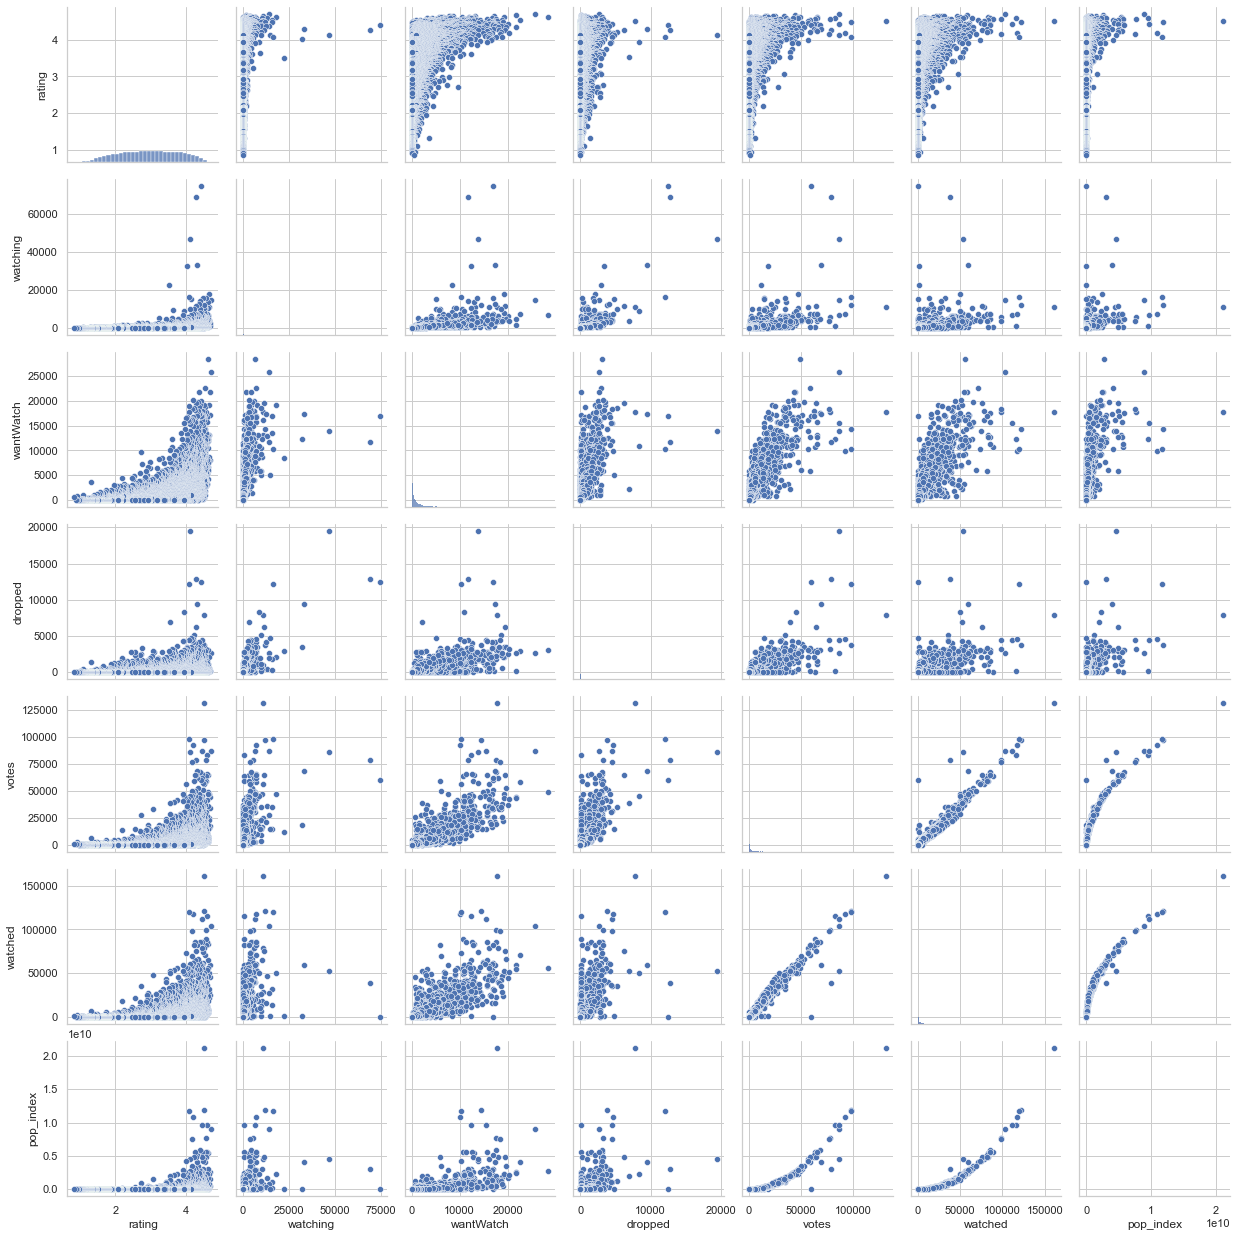

In [129]:
sns.pairplot(model2_data[['rating','watching', 'wantWatch', 'dropped', 'votes', 'watched', 'pop_index']])
plt.show()

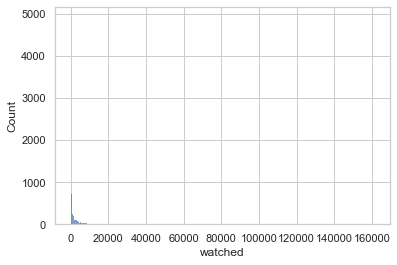

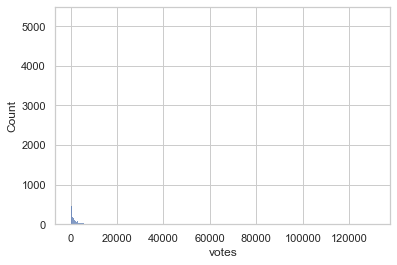

In [130]:
# 'watching', 'wantWatch', 'dropped', 'votes', 'watched', 'pop_index'
sns.histplot(data=model2_data, x='watched')
plt.show()

sns.histplot(data=model2_data, x='votes')
plt.show()

c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


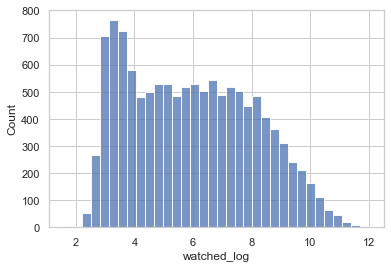

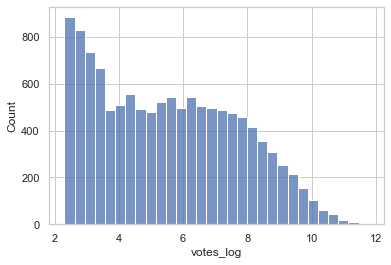

In [131]:
model2_data['watched_log'] = np.log(model2_data['watched'])
model2_data['votes_log'] = np.log(model2_data['votes'])

sns.histplot(data=model2_data, x='watched_log')
plt.show()

sns.histplot(data=model2_data, x='votes_log')
plt.show()

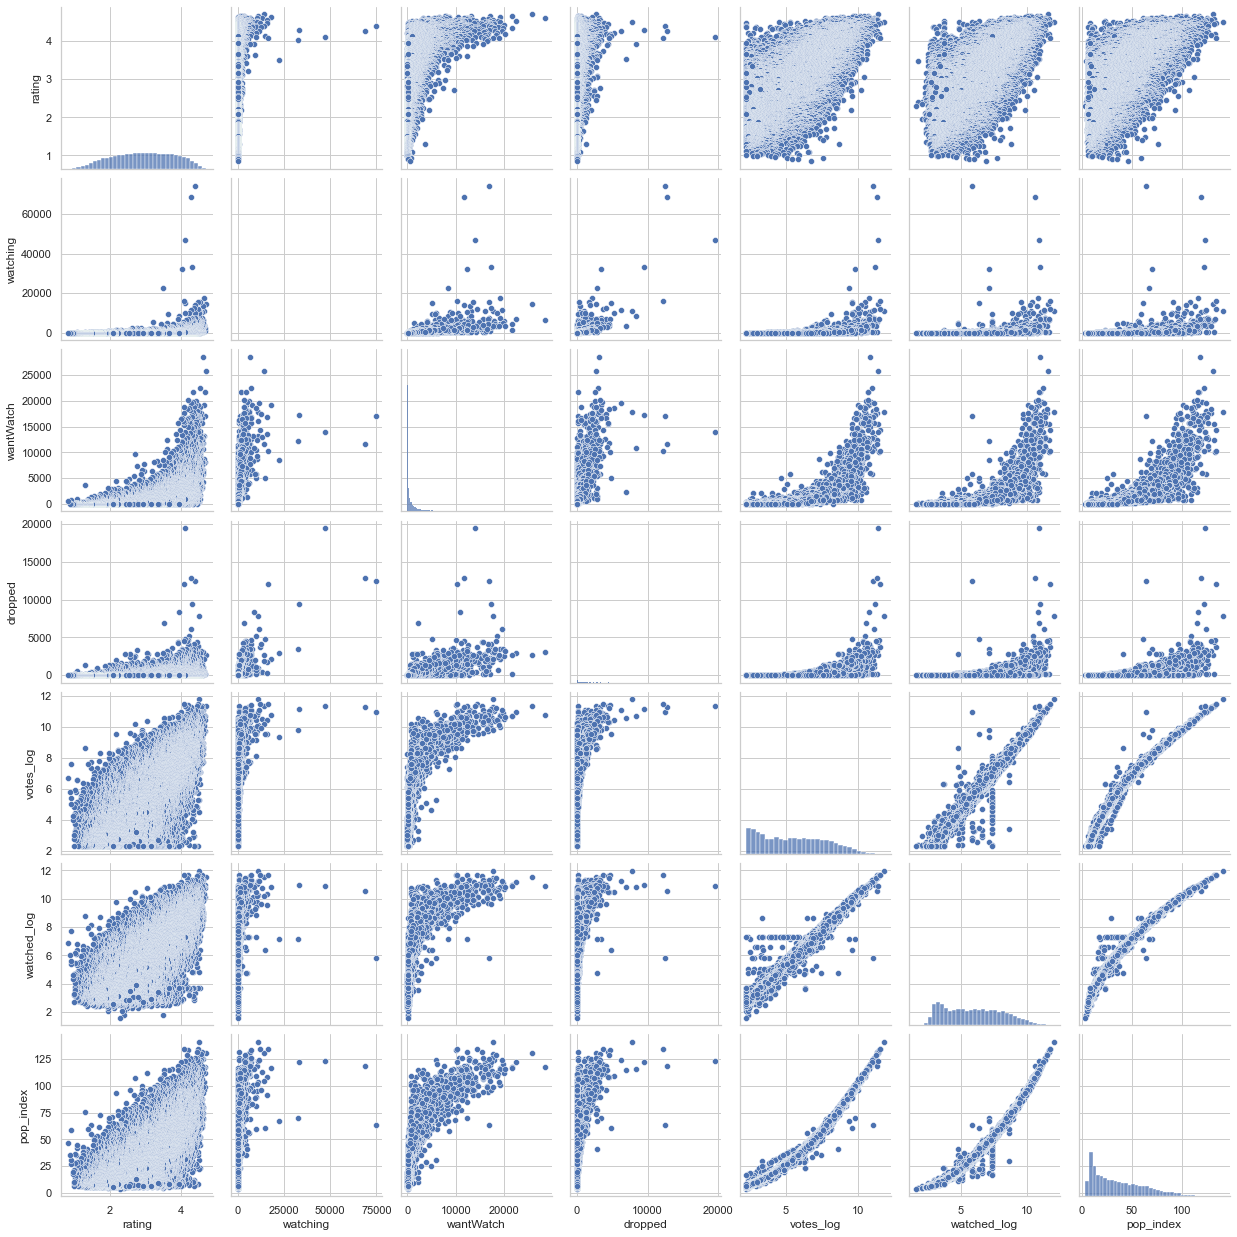

In [132]:
model2_data['pop_index'] = model2_data['watched_log'] * model2_data['votes_log']
sns.pairplot(model2_data[['rating','watching', 'wantWatch', 'dropped', 'votes_log', 'watched_log', 'pop_index']])
plt.show()

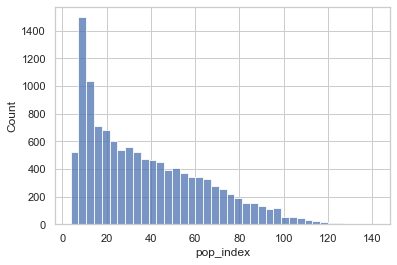

In [148]:
sns.histplot(data=model2_data, x='pop_index')
plt.show()

c:\Users\jimmyb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


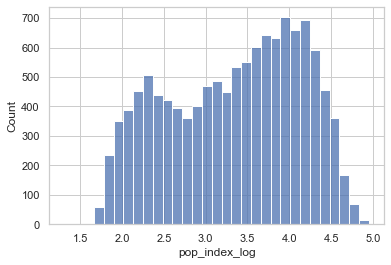

In [149]:
model2_data['pop_index_log'] = np.log(model2_data['pop_index'])
sns.histplot(data=model2_data, x='pop_index_log')
plt.show()

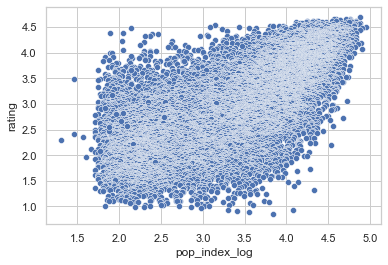

In [150]:
sns.scatterplot(data=model2_data, x='pop_index_log', y='rating')
plt.show()

In [157]:
#model2_data.drop(['watched', 'votes', 'watched_log', 'votes_log'], axis=1, inplace=True)
model2_data.head()

eps  duration  ongoing  years_running  studios_colab  contentWarn  \
0   64       5.0        0              1              0            1   
1    1     107.0        0              0              0            0   
2    1     130.0        0              0              0            1   
3   10       5.0        0              0              0            0   
4   10       5.0        0              0              0            1   

   watching  wantWatch  dropped  rating  tag_Based_on_a_Manga  tag_Comedy  \
0     14351      25810     2656   4.702                     1           0   
1      1453      21733      124   4.663                     0           0   
2       946      17148      132   4.661                     1           0   
3      2183       8082      167   4.660                     1           0   
4      3217       7864      174   4.650                     1           0   

   tag_Action  tag_Fantasy  tag_Sci_Fi  tag_Shounen  tag_Original_Work  \
0           1            1           0            1                  0   
1           0            0           0            0                  1   
2           0            0           0            1                  0   
3           0            0           0            1                  0   
4           1            1           0            1                  0   

   tag_Non_Human_Protagonists  tag_Drama  tag_Adventure  tag_Family_Friendly  \
0                           0          1              1                    0   
1                           0          1              0                    0   
2                           0          1              0                    0   
3                           0          0              0                    0   
4                           0          0              0                    0   

   tag_Short_Episodes  tag_School_Life  tag_Romance  tag_Shorts  \
0                   0                0            0           0   
1                   0                1            1           0   
2                   0                1            0           0   
3                   0                1            0           0   
4                   0                0            0           0   

   tag_Slice_of_Life  tag_Seinen  tag_Supernatural  tag_Magic  \
0                  0           0                 0          0   
1                  0           0                 1          0   
2                  0           0                 0          0   
3                  0           0                 0          0   
4                  0           0                 0          0   

   tag_Animal_Protagonists  tag_Ecchi  tag_Mecha  tag_Based_on_a_Light_Novel  \
0                        0          0          0                           0   
1                        0          0          0                           0   
2                        0          0          0                           0   
3                        0          0          0                           0   
4                        0          0          0                           0   

   tag_CG_Animation  tag_Superpowers  tag_Others  tag_missing  \
0                 0                0           0            0   
1                 0                0           0            0   
2                 0                0           0            0   
3                 0                0           0            0   
4                 0                0           0            0   

   mediaType_Movie  mediaType_Music Video  mediaType_OVA  mediaType_Other  \
0                0                      0              0                0   
1                1                      0              0                0   
2                1                      0              0                0   
3                0                      0              0                0   
4                0                      0              0                0   

   mediaType_TV  mediaType_TV Special  mediaType_Web

In [158]:
X6 = model2_data.drop(['rating'], axis=1)
y6 = model2_data['rating']
X6 = sm.add_constant(X)

print(X6.shape)
print(y6.shape)

# Using 80/20 split since we have a good amount of data
# If we had less than 2,000 or so I might be inclined to go with a 70/30 split
X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X6, y6, test_size=0.20, random_state=23
)

olsmod_6 = sm.OLS(y_train6, X_train6)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

(12101, 46)
(12101,)
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:55:05   Log-Likelihood:                -8491.7
No. Observations:                9680   AIC:                         1.708e+04
Df Residuals:                    9634   BIC:                         1.741e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [159]:

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                          20.627414
eps                             3.102920
duration                        3.007037
ongoing                         1.158996
years_running                   3.156445
studios_colab                   1.023271
contentWarn                     1.237941
watched                       151.947270
watching                        7.184473
wantWatch                       4.496628
dropped                         5.111949
votes                         199.603012
tag_Based_on_a_Manga            2.617684
tag_Comedy                      1.373012
tag_Action                      1.463493
tag_Fantasy                     1.383254
tag_Sci_Fi                      1.537492
tag_Shounen                     1.939241
tag_Original_Work               1.249117
tag_Non_Human_Protagonists      2.036647
tag_Drama                       1.201071
tag_Adventure                   1.175739
tag_Family_Friendly             1.323006
tag_Short_Episodes              1.369203
ta